# Chapter 14: Convolutional Networks, Deep vision


In [3]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples

class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

Doing this in normal Python instead because even loading the dataset fails when there is no Javascript suppport.

Seriously, this is really brittle stuff, and it is surprising that this is the backbone of the hottest trend of 2020.


# Exercises

1. A CNN has fewer parameters than an equivalent DNN. It also takes advantage of spatial information better than a DNN. Finally, a CNN can be made somewhat independent of input image size using Fully Convolutional Networks (FCNs)

2. 

3. If a GPU runs out of memory, techniques:
 * Reduce batch size
 * Reduce the number of parameters (increasing stride, increasing filter size, reducing layers)
 * Get a better GPU
 * Get more GPU instances to split the training load
 * Run training on a CPU instead, at slower speed.

4. A max-pooling layer can aggregate information from various layers, and also be more resilient to variations in any one layer. A CNN, by contrast, will consider all the values and might be too sensitive to the individual values.

5. A local response normalization helps to get the network to specialize for different features, rather than having the model pick up on the same features in different nodes.

6. Different features
 * LeNet: Introduced the idea of Convolution and Pooling
 * AlexNet: Had convolution layers on top of convolution layers
 * GoogleNet: Had Inception modules, with skip connections, and different scales to learn features at different levels of granularity.
 * ResNet: Added residual connections to avoid vanishing gradients. Allowed the network to train faster, and be resilient against dead layers of Convolutions.
 * SENet: Added Squeeze and Excitation layers that inhibited information in one area.
 * Xception: Two types of Convolution layes, stacked strictly one on top of the other. The first looks for purely spatial information along a single channel (or a single feature map), while the second looks purely for non-spatial (1x1 filters) information across the channels (or feature maps)
 
 7. A fully convolutional network has only convolution and max-pooling layers. Since these are indepedent of the input image size, they can be used to train larger images and produce the same predictive power as the final layer being a fully connected (dense) layer.
 
To convert a dense final output layer with 200 neurons to a Fully Convolutional Network, you change the output layer to 200 layers each of 1x1 pixel, that are dependent on the bottleneck layer below it. The weights will be identical to the equivalent dense layer. And then each of these layers produces a probability of output $i$, unlike each neuron producing output $i$.
 
 8. Semantic Segmentation requires labeled data, which is difficult. But the biggest difficulty is that CNNs lose spatial information, which is critical for semantic segmentation.
 
 9. Build a CNN from scratch on MNIST.

In [2]:
import Chapter_10 as c10

X_train, X_valid, X_test, y_train, y_valid, y_test = c10.load_digits_mnist(debug=True)                                                

def prepare_data(X_train, X_valid, X_test, debug=False):
    if (debug):
        print ("X_train shape = ", X_train.shape)
        print ("X_valid shape = ", X_valid.shape)
        print ("X_test shape = ", X_test.shape)

    X_train = X_train.reshape(55000,28,28,1)
    X_valid = X_valid.reshape(5000,28,28,1)
    X_test = X_test.reshape(10000,28,28,1)
    return X_train, X_valid, X_test

X_train, X_valid, X_test = prepare_data(X_train, X_valid, X_test)

X_train shape =  (55000, 28, 28)
X_valid shape =  (5000, 28, 28)
X_test shape =  (10000, 28, 28)


In [4]:
# Create the deep convolutional model listed in Chapter 14, that is much better than the naive MNIST.
# Let's see how good this is, since all the data is already loaded here.
import tensorflow as tf
import tensorflow.keras as keras

def create_model(optimizer="sgd"):
    deep_model = keras.models.Sequential([
        keras.layers.Conv2D(32, 4, activation="relu", padding="same", 
                            input_shape=(28, 28, 1), name="input"),
        keras.layers.MaxPooling2D(1,name="firstPool"),
        keras.layers.Conv2D(128, 3, activation="relu", padding="same", 
                            name="first_conv_1"),
        keras.layers.Conv2D(128, 3, activation="relu", padding="same", 
                            name="first_conv_2"),

        keras.layers.MaxPooling2D(1, name="secondPool"),
        keras.layers.Conv2D(256, 3, activation="relu", padding="same", 
                            name="second_conv_1"),
        keras.layers.Conv2D(256, 3, activation="relu", padding="same", 
                            name="second_conv_2"),

        keras.layers.MaxPooling2D(1, name="thirdPool"),

        keras.layers.Flatten(name="flatten"),
        keras.layers.Dense(128, activation="relu", name="pre-bottneck"),

        keras.layers.Dropout(0.5, name="bottleneckDropout"),
        keras.layers.Dense(64, activation="relu", name="bottleneck"),

        keras.layers.Dropout(0.5, name="outputDropout"),
        keras.layers.Dense(10, activation="softmax", name="output"),
    ])
    
    deep_model.compile(loss="sparse_categorical_crossentropy",
                      optimizer=optimizer,
                      metrics=["accuracy"])

    return deep_model

def fit_model(model, X_train, y_train, X_valid, y_valid, epochs):
    history_conv = model.fit(x=X_train, y=y_train, batch_size=32, validation_data=[X_valid, y_valid],
                             epochs=epochs, verbose=0)
    return history_conv

def plot_history(history, name):
    c10.plot_training(history, name, show=True)

# Create the model and train it
model = create_model()
history = fit_model(model, X_train, y_train, X_valid, y_valid, epochs=10)
plot_history(history, "naive_deep_mnist")

KeyboardInterrupt: 

This is the problem with Tensorflow. The error startements are reminiscent of g++ in 2000. The errors you get are deep in the stack. It is literally the full call graph of the compiler flow with no real help for a user reading them.

Here is a sample output. Quick, what is this failure?



```
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-24-88fd4d8bab85> in <module>
     41 
     42 model = create_model()
---> 43 history = fit_model(model, X_train, y_train, X_valid, y_valid, epochs=10)
     44 plot_history(history, "naive_deep_mnist")

<ipython-input-24-88fd4d8bab85> in fit_model(model, X_train, y_train, X_valid, y_valid, epochs)
     34 
     35 def fit_model(model, X_train, y_train, X_valid, y_valid, epochs):
---> 36     history_conv = model.fit(X_train, y_train, validation_data=[X_valid, y_valid], epochs=epochs, verbose=0)
     37     return history_conv
     38 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py in _method_wrapper(self, *args, **kwargs)
    106   def _method_wrapper(self, *args, **kwargs):
    107     if not self._in_multi_worker_mode():  # pylint: disable=protected-access
--> 108       return method(self, *args, **kwargs)
    109 
    110     # Running inside `run_distribute_coordinator` already.

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py in fit(self, x, y, batch_size, epochs, verbose, callbacks, validation_split, validation_data, shuffle, class_weight, sample_weight, initial_epoch, steps_per_epoch, validation_steps, validation_batch_size, validation_freq, max_queue_size, workers, use_multiprocessing)
   1096                 batch_size=batch_size):
   1097               callbacks.on_train_batch_begin(step)
-> 1098               tmp_logs = train_function(iterator)
   1099               if data_handler.should_sync:
   1100                 context.async_wait()

/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/def_function.py in __call__(self, *args, **kwds)
    778       else:
    779         compiler = "nonXla"
--> 780         result = self._call(*args, **kwds)
    781 
    782       new_tracing_count = self._get_tracing_count()

/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/def_function.py in _call(self, *args, **kwds)
    821       # This is the first call of __call__, so we have to initialize.
    822       initializers = []
--> 823       self._initialize(args, kwds, add_initializers_to=initializers)
    824     finally:
    825       # At this point we know that the initialization is complete (or less

/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/def_function.py in _initialize(self, args, kwds, add_initializers_to)
    694     self._graph_deleter = FunctionDeleter(self._lifted_initializer_graph)
    695     self._concrete_stateful_fn = (
--> 696         self._stateful_fn._get_concrete_function_internal_garbage_collected(  # pylint: disable=protected-access
    697             *args, **kwds))
    698 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/function.py in _get_concrete_function_internal_garbage_collected(self, *args, **kwargs)
   2853       args, kwargs = None, None
   2854     with self._lock:
-> 2855       graph_function, _, _ = self._maybe_define_function(args, kwargs)
   2856     return graph_function
   2857 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/function.py in _maybe_define_function(self, args, kwargs)
   3211 
   3212       self._function_cache.missed.add(call_context_key)
-> 3213       graph_function = self._create_graph_function(args, kwargs)
   3214       self._function_cache.primary[cache_key] = graph_function
   3215       return graph_function, args, kwargs

/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/function.py in _create_graph_function(self, args, kwargs, override_flat_arg_shapes)
   3063     arg_names = base_arg_names + missing_arg_names
   3064     graph_function = ConcreteFunction(
-> 3065         func_graph_module.func_graph_from_py_func(
   3066             self._name,
   3067             self._python_function,

/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/func_graph.py in func_graph_from_py_func(name, python_func, args, kwargs, signature, func_graph, autograph, autograph_options, add_control_dependencies, arg_names, op_return_value, collections, capture_by_value, override_flat_arg_shapes)
    984         _, original_func = tf_decorator.unwrap(python_func)
    985 
--> 986       func_outputs = python_func(*func_args, **func_kwargs)
    987 
    988       # invariant: `func_outputs` contains only Tensors, CompositeTensors,

/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/def_function.py in wrapped_fn(*args, **kwds)
    598         # __wrapped__ allows AutoGraph to swap in a converted function. We give
    599         # the function a weak reference to itself to avoid a reference cycle.
--> 600         return weak_wrapped_fn().__wrapped__(*args, **kwds)
    601     weak_wrapped_fn = weakref.ref(wrapped_fn)
    602 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/func_graph.py in wrapper(*args, **kwargs)
    971           except Exception as e:  # pylint:disable=broad-except
    972             if hasattr(e, "ag_error_metadata"):
--> 973               raise e.ag_error_metadata.to_exception(e)
    974             else:
    975               raise

ValueError: in user code:

    /usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_15 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 28, 28]

```


I am sure that an experienced Tensorflow user can find out exactly what the problem is. That is exactly the point. I'm trying to construct a deep CNN, using some rudimentary Python code. This is the full code:

```
import tensorflow as tf
import tensorflow.keras as keras

def create_model(optimizer="sgd"):
    deep_model = keras.models.Sequential([
        keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[1, 28, 28]),
        keras.layers.MaxPooling2D(1),
        keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
        keras.layers.Conv2D(128, 3, activation="relu", padding="same"),

        keras.layers.MaxPooling2D(1),
        keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
        keras.layers.Conv2D(256, 3, activation="relu", padding="same"),

        keras.layers.MaxPooling2D(1),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),

        keras.layers.Dropout(0.5),
        keras.layers.Dense(64, activation="relu"),

        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation="softmax"),
    ])
    
    deep_model.compile(loss="sparse_categorical_crossentropy",
                      optimizer=optimizer,
                      metrics=["accuracy"])

    return deep_model

def fit_model(model, X_train, y_train, X_valid, y_valid, epochs):
    history_conv = model.fit(X_train, y_train, validation_data=[X_valid, y_valid], epochs=epochs, verbose=0)
    return history_conv

def plot_history(history, name):
    c10.plot_training(history, name, show=True)
    
model = create_model()
history = fit_model(model, X_train, y_train, X_valid, y_valid, epochs=10)
plot_history(history, "naive_deep_mnist")
```

When the full error is deeper and more inscrutable than the full code, the tool is not helpful. It might as well say, "You've got a problem somewhere."



Here's another error:

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-25-8233eab5f9a3> in <module>
     40     c10.plot_training(history, name, show=True)
     41 
---> 42 model = create_model()
     43 history = fit_model(model, X_train, y_train, X_valid, y_valid, epochs=10)
     44 plot_history(history, "naive_deep_mnist")

<ipython-input-25-8233eab5f9a3> in create_model(optimizer)
      5 
      6 def create_model(optimizer="sgd"):
----> 7     deep_model = keras.models.Sequential([
      8         keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[1, 28, 28], name="input"),
      9         keras.layers.MaxPooling2D(1,name="firstPool"),

/usr/local/lib/python3.8/dist-packages/tensorflow/python/training/tracking/base.py in _method_wrapper(self, *args, **kwargs)
    455     self._self_setattr_tracking = False  # pylint: disable=protected-access
    456     try:
--> 457       result = method(self, *args, **kwargs)
    458     finally:
    459       self._self_setattr_tracking = previous_value  # pylint: disable=protected-access

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/sequential.py in __init__(self, layers, name)
    140         layers = [layers]
    141       for layer in layers:
--> 142         self.add(layer)
    143 
    144   @property

/usr/local/lib/python3.8/dist-packages/tensorflow/python/training/tracking/base.py in _method_wrapper(self, *args, **kwargs)
    455     self._self_setattr_tracking = False  # pylint: disable=protected-access
    456     try:
--> 457       result = method(self, *args, **kwargs)
    458     finally:
    459       self._self_setattr_tracking = previous_value  # pylint: disable=protected-access

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/sequential.py in add(self, layer)
    219       # If the model is being built continuously on top of an input layer:
    220       # refresh its output.
--> 221       output_tensor = layer(self.outputs[0])
    222       if len(nest.flatten(output_tensor)) != 1:
    223         raise ValueError(SINGLE_LAYER_OUTPUT_ERROR_MSG)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/base_layer.py in __call__(self, *args, **kwargs)
    923     # >> model = tf.keras.Model(inputs, outputs)
    924     if _in_functional_construction_mode(self, inputs, args, kwargs, input_list):
--> 925       return self._functional_construction_call(inputs, args, kwargs,
    926                                                 input_list)
    927 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/base_layer.py in _functional_construction_call(self, inputs, args, kwargs, input_list)
   1115           try:
   1116             with ops.enable_auto_cast_variables(self._compute_dtype_object):
-> 1117               outputs = call_fn(cast_inputs, *args, **kwargs)
   1118 
   1119           except errors.OperatorNotAllowedInGraphError as e:

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/layers/core.py in call(self, inputs, training)
    214           rate=self.rate)
    215 
--> 216     output = tf_utils.smart_cond(training,
    217                                  dropped_inputs,
    218                                  lambda: array_ops.identity(inputs))

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/tf_utils.py in smart_cond(pred, true_fn, false_fn, name)
     62     return control_flow_ops.cond(
     63         pred, true_fn=true_fn, false_fn=false_fn, name=name)
---> 64   return smart_module.smart_cond(
     65       pred, true_fn=true_fn, false_fn=false_fn, name=name)
     66 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/smart_cond.py in smart_cond(pred, true_fn, false_fn, name)
     56       return false_fn()
     57   else:
---> 58     return control_flow_ops.cond(pred, true_fn=true_fn, false_fn=false_fn,
     59                                  name=name)
     60 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py in wrapper(*args, **kwargs)
    199     """Call target, and fall back on dispatchers if there is a TypeError."""
    200     try:
--> 201       return target(*args, **kwargs)
    202     except (TypeError, ValueError):
    203       # Note: convert_to_eager_tensor currently raises a ValueError, not a

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/deprecation.py in new_func(*args, **kwargs)
    505                 'in a future version' if date is None else ('after %s' % date),
    506                 instructions)
--> 507       return func(*args, **kwargs)
    508 
    509     doc = _add_deprecated_arg_notice_to_docstring(

/usr/local/lib/python3.8/dist-packages/tensorflow/python/ops/control_flow_ops.py in cond(pred, true_fn, false_fn, strict, name, fn1, fn2)
   1178   if (util.EnableControlFlowV2(ops.get_default_graph()) and
   1179       not context.executing_eagerly()):
-> 1180     return cond_v2.cond_v2(pred, true_fn, false_fn, name)
   1181 
   1182   # We needed to make true_fn/false_fn keyword arguments for

/usr/local/lib/python3.8/dist-packages/tensorflow/python/ops/cond_v2.py in cond_v2(pred, true_fn, false_fn, name)
     77       pred = array_ops.squeeze_v2(pred)
     78 
---> 79     true_graph = func_graph_module.func_graph_from_py_func(
     80         true_name,
     81         true_fn, [], {},

/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/func_graph.py in func_graph_from_py_func(name, python_func, args, kwargs, signature, func_graph, autograph, autograph_options, add_control_dependencies, arg_names, op_return_value, collections, capture_by_value, override_flat_arg_shapes)
    984         _, original_func = tf_decorator.unwrap(python_func)
    985 
--> 986       func_outputs = python_func(*func_args, **func_kwargs)
    987 
    988       # invariant: `func_outputs` contains only Tensors, CompositeTensors,

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/layers/core.py in dropped_inputs()
    208 
    209     def dropped_inputs():
--> 210       return nn.dropout(
    211           inputs,
    212           noise_shape=self._get_noise_shape(inputs),

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py in wrapper(*args, **kwargs)
    199     """Call target, and fall back on dispatchers if there is a TypeError."""
    200     try:
--> 201       return target(*args, **kwargs)
    202     except (TypeError, ValueError):
    203       # Note: convert_to_eager_tensor currently raises a ValueError, not a

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/deprecation.py in new_func(*args, **kwargs)
    505                 'in a future version' if date is None else ('after %s' % date),
    506                 instructions)
--> 507       return func(*args, **kwargs)
    508 
    509     doc = _add_deprecated_arg_notice_to_docstring(

/usr/local/lib/python3.8/dist-packages/tensorflow/python/ops/nn_ops.py in dropout(x, keep_prob, noise_shape, seed, name, rate)
   4940     raise ValueError("You must provide a rate to dropout.")
   4941 
-> 4942   return dropout_v2(x, rate, noise_shape=noise_shape, seed=seed, name=name)
   4943 
   4944 

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py in wrapper(*args, **kwargs)
    199     """Call target, and fall back on dispatchers if there is a TypeError."""
    200     try:
--> 201       return target(*args, **kwargs)
    202     except (TypeError, ValueError):
    203       # Note: convert_to_eager_tensor currently raises a ValueError, not a

/usr/local/lib/python3.8/dist-packages/tensorflow/python/ops/nn_ops.py in dropout_v2(x, rate, noise_shape, seed, name)
   5054     # NOTE: Random uniform can only generate 2^23 floats on [1.0, 2.0)
   5055     # and subtract 1.0.
-> 5056     random_tensor = random_ops.random_uniform(
   5057         noise_shape, seed=seed, dtype=x_dtype)
   5058     # NOTE: if (1.0 + rate) - 1 is equal to rate, then that float is selected,

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py in wrapper(*args, **kwargs)
    199     """Call target, and fall back on dispatchers if there is a TypeError."""
    200     try:
--> 201       return target(*args, **kwargs)
    202     except (TypeError, ValueError):
    203       # Note: convert_to_eager_tensor currently raises a ValueError, not a

/usr/local/lib/python3.8/dist-packages/tensorflow/python/ops/random_ops.py in random_uniform(shape, minval, maxval, dtype, seed, name)
    299           shape, minval, maxval, seed=seed1, seed2=seed2, name=name)
    300     else:
--> 301       result = gen_random_ops.random_uniform(
    302           shape, dtype, seed=seed1, seed2=seed2)
    303       if minval_is_zero:

/usr/local/lib/python3.8/dist-packages/tensorflow/python/ops/gen_random_ops.py in random_uniform(shape, dtype, seed, seed2, name)
    740     seed2 = 0
    741   seed2 = _execute.make_int(seed2, "seed2")
--> 742   _, _, _op, _outputs = _op_def_library._apply_op_helper(
    743         "RandomUniform", shape=shape, dtype=dtype, seed=seed, seed2=seed2,
    744                          name=name)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/op_def_library.py in _apply_op_helper(op_type_name, name, **keywords)
    574         else:
    575           for base_type in base_types:
--> 576             _SatisfiesTypeConstraint(base_type,
    577                                      _Attr(op_def, input_arg.type_attr),
    578                                      param_name=input_name)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/op_def_library.py in _SatisfiesTypeConstraint(dtype, attr_def, param_name)
     55     allowed_list = attr_def.allowed_values.list.type
     56     if dtype not in allowed_list:
---> 57       raise TypeError(
     58           "Value passed to parameter '%s' has DataType %s not in list of "
     59           "allowed values: %s" %

TypeError: Value passed to parameter 'shape' has DataType string not in list of allowed values: int32, int64


```
created by this code
```
# Create the deep convolutional model listed in Chapter 14, that is much better than the naive MNIST.
# Let's see how good this is, since all the data is already loaded here.
import tensorflow as tf
import tensorflow.keras as keras

def create_model(optimizer="sgd"):
    deep_model = keras.models.Sequential([
        keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[1, 28, 28], name="input"),
        keras.layers.MaxPooling2D(1,name="firstPool"),
        keras.layers.Conv2D(128, 3, activation="relu", padding="same", name="first_conv_1"),
        keras.layers.Conv2D(128, 3, activation="relu", padding="same", name="first_conv_2"),

        keras.layers.MaxPooling2D(1, name="secondPool"),
        keras.layers.Conv2D(256, 3, activation="relu", padding="same", name="second_conv_1"),
        keras.layers.Conv2D(256, 3, activation="relu", padding="same", name="second_conv_2"),

        keras.layers.MaxPooling2D(1, name="thirdPool"),

        keras.layers.Flatten(name="flatten"),
        keras.layers.Dense(128, activation="relu", name="pre-bottneck"),

        keras.layers.Dropout(0.5, "bottleneckDropout"),
        keras.layers.Dense(64, activation="relu", name="bottleneck"),

        keras.layers.Dropout(0.5, "outputDropout"),
        keras.layers.Dense(10, activation="softmax", name="output"),
    ])
    
    deep_model.compile(loss="sparse_categorical_crossentropy",
                      optimizer=optimizer,
                      metrics=["accuracy"])

    return deep_model

def fit_model(model, X_train, y_train, X_valid, y_valid, epochs):
    history_conv = model.fit(X_train, y_train, validation_data=[X_valid, y_valid], epochs=epochs, verbose=0)
    return history_conv

def plot_history(history, name):
    c10.plot_training(history, name, show=True)
    
model = create_model()
history = fit_model(model, X_train, y_train, X_valid, y_valid, epochs=10)
plot_history(history, "naive_deep_mnist")
```

Switched to the .py file for Exercise 9. That's taking a few days to run on my ancient machine, but running well. It's called run_c14_e9(). Iterating with errors on that instead of Jupyter because ipython is so much better at identifying errors and resuming.



# Exercise 11: Style Transfer

Doing the [Style transfer tutorial](https://www.tensorflow.org/tutorials/generative/style_transfer).


In [41]:
import os

import IPython.display as display

import functools
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image

import tensorflow as tf
import tensorflow_hub as hub
import time


# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

def tensor_to_image(tensor):
    "Convert from tensor to image"
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

def load_img(path_to_img):
    "Loads the image provided in the first argument as a path"
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

def imshow(image, title=None):
    "Display the image"
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)


def load_style_transfer_data():
    """Load the two images: dog and kandinsky art
    Call with:
    content_path, style_path = load_style_transfer_data()
    """
    content_path = tf.keras.utils.get_file(
        'YellowLabradorLooking_new.jpg', 
        'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
    style_path = tf.keras.utils.get_file(
        'kandinsky5.jpg',
        'https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')
    return content_path, style_path

def load_tiger_monet():
    """
    Call with:
    tiger_image, monet_image = load_tiger_monet()
    """
    tiger_path=tf.keras.utils.get_file('tiger.jpg', 'https://gallery.eggwall.com/static/tiger.jpg')
    tiger_image = load_img(tiger_path)
    location='https://upload.wikimedia.org/wikipedia/commons/5/59/Monet_-_Impression%2C_Sunrise.jpg'
    monet_path=tf.keras.utils.get_file('monet.jpg', location)
    monet_image = load_img(monet_path)
    plt.subplot(1,2,1)
    imshow(tiger_image, "Content Image")

    plt.subplot(1, 2, 2)
    imshow(monet_image, 'Style Image')

    return tiger_image, monet_image

def load_images():
    """
    Call with:
    content_image, style_image = load_images()
    """
    content_path, style_path = load_style_transfer_data()
    content_image = load_img(content_path)
    style_image = load_img(style_path)

    plt.subplot(1, 2, 1)
    imshow(content_image, 'Content Image')

    plt.subplot(1, 2, 2)
    imshow(style_image, 'Style Image')

    return content_image, style_image

def load_hub_model(content_image, style_image):
    """
    Call with:
    hub_model, transfer_image = load_hub_model(content_image, style_image)
    """
    hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
    stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
    image = tensor_to_image(stylized_image)

    return hub_model, image

def apply_style(original_url, style_url):
    """
    Call with:
    styled_image = apply_style('http://x.com/original.jpg', 'http://x.com/style.jpg')"""
    content = tf.keras.utils.get_file('content.jpg', original_url)
    orig_img = load_img(content)
    plt.subplot(1,2,1)
    imshow(orig_img, "Content Image")

    style = tf.keras.utils.get_file('style.jpg', style_url)
    style_img = load_img(style)
    plt.subplot(1, 2, 2)
    imshow(style_img, 'Style Image')
    
    
    hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
    stylized_image = hub_model(tf.constant(orig_img), tf.constant(style_img))[0]
    applied_image = tensor_to_image(stylized_image)

    return applied_image



In [9]:
content_path, style_path = load_style_transfer_data()

In [10]:
content_path

'/home/viki/.keras/datasets/YellowLabradorLooking_new.jpg'

In [11]:
style_path

'/home/viki/.keras/datasets/kandinsky5.jpg'

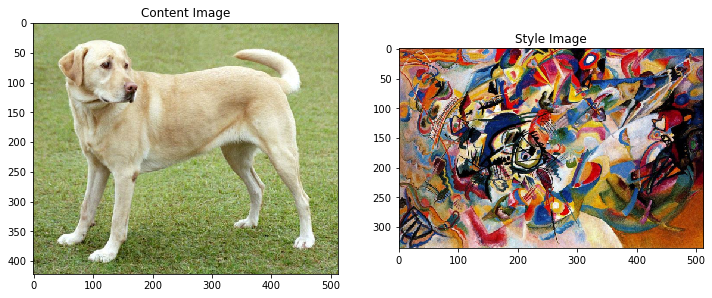

In [13]:
content_image, style_image = load_images()

In [24]:
hub_model, transfer_image = load_hub_model(content_image, style_image)

In [25]:
imshow(transfer_image)

AttributeError: 'Image' object has no attribute 'shape'

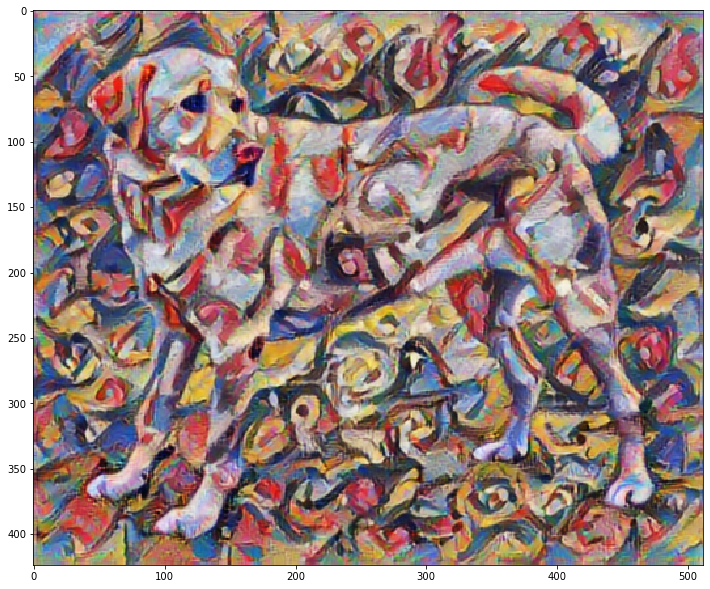

In [26]:
plt.imshow(transfer_image)

221184/214743 [==============================] - 0s 1us/step


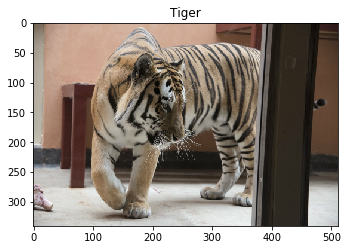

In [30]:
tiger_image = load_tiger()

7110656/7105965 [==============================] - 3s 0us/step


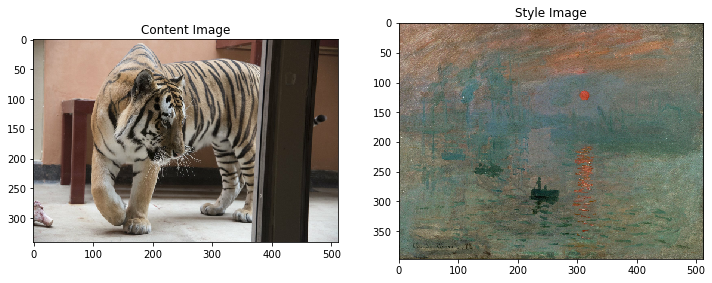

In [34]:
tiger_image, monet_image = load_tiger_monet()

In [31]:
hub_model2, transfer_tiger = load_hub_model(tiger_image, style_image)

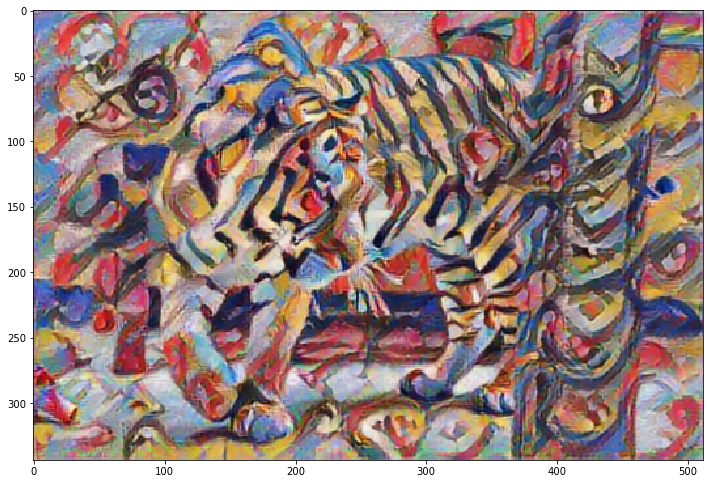

In [32]:
plt.imshow(transfer_tiger)

In [35]:
hub_model2, transfer_tiger = load_hub_model(tiger_image, monet_image)

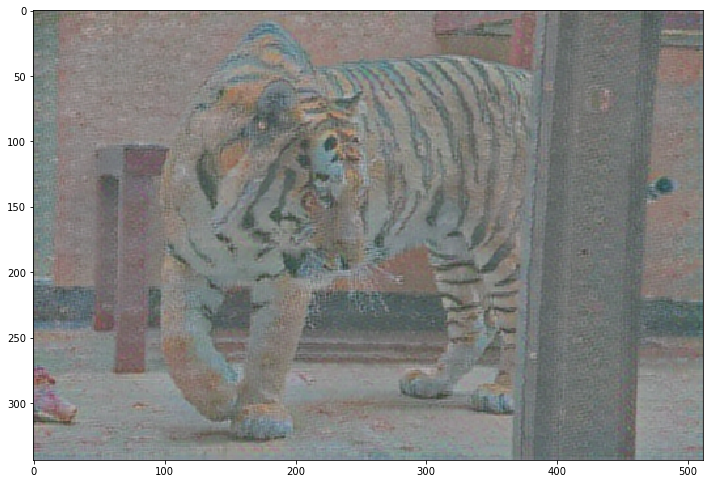

In [36]:
plt.imshow(transfer_tiger)

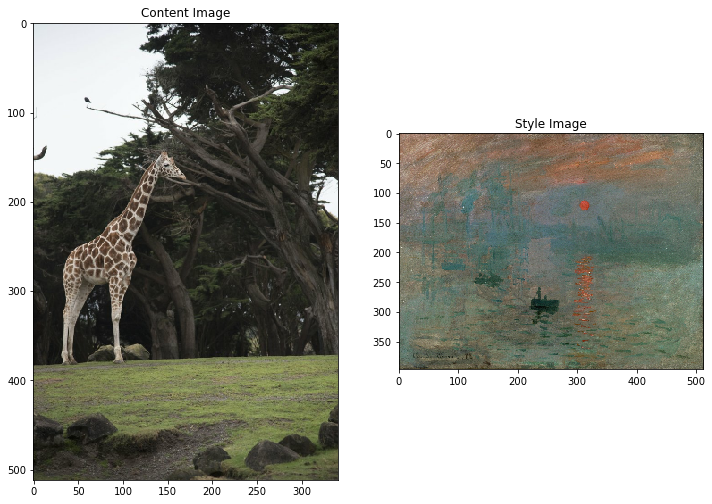

In [45]:
giraffe='https://gallery.eggwall.com/gallery_NaniNanaZoo/_DSC3925.jpg'
monet='https://upload.wikimedia.org/wikipedia/commons/5/59/Monet_-_Impression%2C_Sunrise.jpg'
styled_image = apply_style(giraffe, monet)

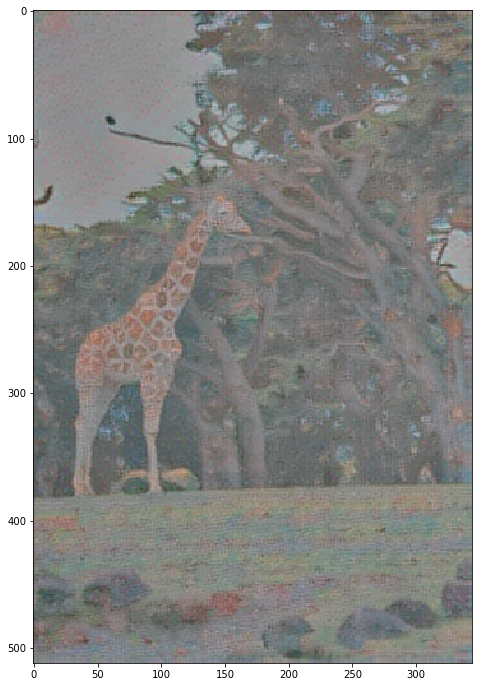

In [44]:
plt.imshow(styled_image)

This works great. Let's go through the rest of the tutorial



In [61]:
def weights_vgg(vgg, image):
    # Preprocess the image according to the inputs vgg19 expects
    x = tf.keras.applications.vgg19.preprocess_input(image *255)
    x = tf.image.resize(x, (224, 224))
     
    # Apply vgg19 to the image:
    prediction_probabilities = vgg(x)
    print("Probabilities shape: ", prediction_probabilities.shape)
    return prediction_probabilities

def load_vgg19(include_top=False):
    """
    Call with:
    vgg = load_vgg19() # load without classification.
    vgg = load_vgg19(True) # load with classification.
    """
    vgg = tf.keras.applications.VGG19(include_top=include_top, weights='imagenet')
    return vgg
    

def predicted_names(pprobs):
    predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(pprobs.numpy())[0]
    m = [(class_name, prob) for (number, class_name, prob) in predicted_top_5]
    return m

In [56]:
vgg = load_vgg19(True)
pprobs = weights_vgg(vgg, tiger_image)

Probabilities shape:  (1, 1000)


In [57]:
m = predicted_names(pprobs)

In [58]:
print (m)

[('tiger', 0.78859854), ('tiger_cat', 0.20455576), ('zebra', 0.0033517096), ('tabby', 0.00095035677), ('Egyptian_cat', 0.0006222472)]


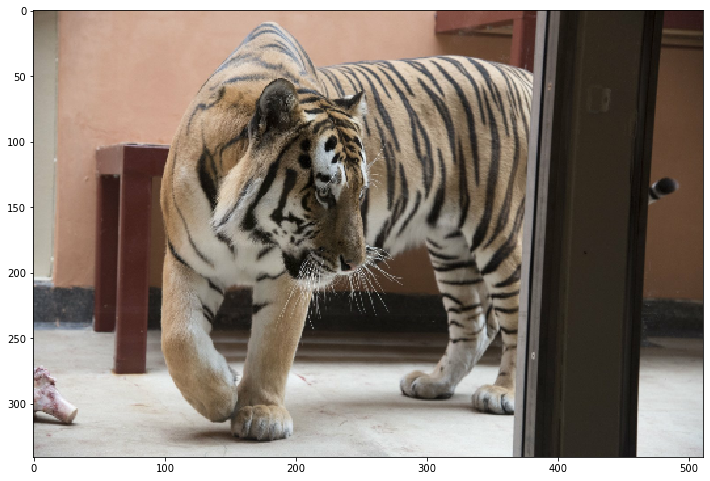

In [54]:
imshow(tiger_image)

In [60]:
for layer in vgg.layers:
    print (layer.name)

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool
flatten
fc1
fc2
predictions


In [62]:
vgg_noclass = load_vgg19(False)

80142336/80134624 [==============================] - 27s 0us/step


In [63]:
for layer in vgg_noclass.layers:
    print (layer.name)

input_4
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [65]:
# Build a model with just the intermediate layers
def vgg_intermediate(layer_names=None):
    """ Creates a vgg model that returns a list of intermediate output values."""
    
    if (layer_names == None):
        style_layers = ['block1_conv1',
                        'block2_conv1',
                        'block3_conv1', 
                        'block4_conv1', 
                        'block5_conv1']
        layer_names = style_layers

    
    # Load our model. Load pretrained VGG, trained on imagenet data
    vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False

    outputs = [vgg.get_layer(name).output for name in layer_names]

    model = tf.keras.Model([vgg.input], outputs)
    return model


In [ ]:
style_model = vgg_intermediate()